In [111]:
#Hussain Alhassan and Zeinab Alazzawi

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
heartdata = pd.read_csv("heart.csv", header = 0)
heartdata.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Unnamed: 12
0,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1,NaN
1,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1,NaN
2,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1,NaN
3,58,M,ASY,132,458,1,Normal,69,N,1.0,Down,0,NaN
4,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,NaN


In [51]:
heartdata=heartdata.drop(['RestingECG','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','Unnamed: 12'],axis=1)
heartdata

,Age,Sex,ChestPainType,RestingBP,HeartDisease
0,51,M,ASY,140,1
1,60,M,ASY,135,1
2,65,M,ASY,145,1
3,58,M,ASY,132,0
4,61,M,NAP,200,1
...,...,...,...,...,...
913,52,M,TA,118,0
914,34,F,ATA,118,0
915,42,M,NAP,120,0
916,54,M,ATA,192,1


In [52]:
#Data size
heartdata.shape

(918, 5)

In [53]:
#see the types of data
heartdata.dtypes

Age               int64
Sex              object
ChestPainType    object
RestingBP         int64
HeartDisease      int64
dtype: object

In [54]:
#Drop any missing values
heartdata.dropna(axis=0)
heartdata

,Age,Sex,ChestPainType,RestingBP,HeartDisease
0,51,M,ASY,140,1
1,60,M,ASY,135,1
2,65,M,ASY,145,1
3,58,M,ASY,132,0
4,61,M,NAP,200,1
...,...,...,...,...,...
913,52,M,TA,118,0
914,34,F,ATA,118,0
915,42,M,NAP,120,0
916,54,M,ATA,192,1


In [55]:
heartdata['Age'] = pd.to_numeric(heartdata['Age'], errors='coerce')
heartdata['RestingBP'] = pd.to_numeric(heartdata['RestingBP'], errors='coerce')
heartdata['HeartDisease'] = pd.to_numeric(heartdata['HeartDisease'], errors='coerce')
heartdata


,Age,Sex,ChestPainType,RestingBP,HeartDisease
0,51,M,ASY,140,1
1,60,M,ASY,135,1
2,65,M,ASY,145,1
3,58,M,ASY,132,0
4,61,M,NAP,200,1
...,...,...,...,...,...
913,52,M,TA,118,0
914,34,F,ATA,118,0
915,42,M,NAP,120,0
916,54,M,ATA,192,1


In [56]:
#Get all the data where Heart Disease is 1 (True)
Heart_Disease = heartdata[heartdata['HeartDisease']==1]
Heart_Disease

,Age,Sex,ChestPainType,RestingBP,HeartDisease
0,51,M,ASY,140,1
1,60,M,ASY,135,1
2,65,M,ASY,145,1
4,61,M,NAP,200,1
5,67,M,ASY,120,1
...,...,...,...,...,...
885,52,M,NAP,128,1
891,40,M,ASY,152,1
896,38,M,TA,120,1
898,57,M,ASY,95,1


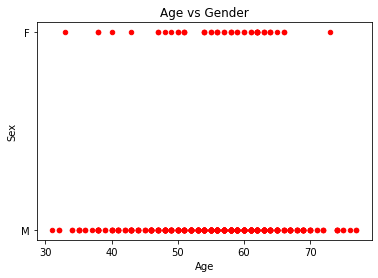

In [57]:
#Relationship between Age and Sex for those who have Heart Disease
Heart_Disease.plot(x='Age',y='Sex',kind = 'scatter', c='red')
plt.title('Age vs Gender')
plt.show()

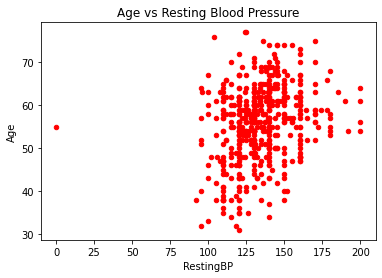

In [58]:
#Relationship between Age and RestingBP for those who have Heart Disease
Heart_Disease.plot(x='RestingBP',y='Age',kind = 'scatter', c='red')
plt.title('Age vs Resting Blood Pressure')
plt.show()

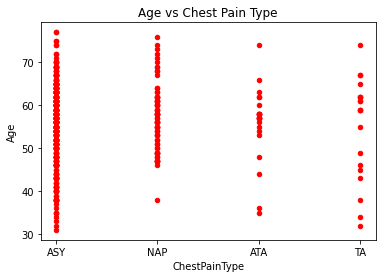

In [59]:
#Relationship between Age and ChestPainType for those who have Heart Disease
Heart_Disease.plot(x='ChestPainType',y='Age',kind = 'scatter', c='red')
plt.title('Age vs Chest Pain Type')
plt.show()

In [60]:
#needed more space
import sys
sys.setrecursionlimit(100000)

In [61]:
#Replace strings in Sex
heartdata['Sex'].replace('M', 1 ,inplace=True)
heartdata['Sex'].replace('F', 2 ,inplace=True)
heartdata['Sex']

0      1
1      1
2      1
3      1
4      1
      ..
913    1
914    2
915    1
916    1
917    1
Name: Sex, Length: 918, dtype: int64

In [62]:
#Replace strings in ChestPainType
heartdata['ChestPainType'].replace('ASY', 1 ,inplace=True)
heartdata['ChestPainType'].replace('ATA', 2 ,inplace=True)
heartdata['ChestPainType'].replace('NAP', 3 ,inplace=True)
heartdata['ChestPainType'].replace('TA', 4 ,inplace=True)
heartdata['ChestPainType']

0      1
1      1
2      1
3      1
4      3
      ..
913    4
914    2
915    3
916    2
917    2
Name: ChestPainType, Length: 918, dtype: int64

In [63]:
X = heartdata.iloc[:, :1].values
y = heartdata.iloc[:, -1].values

In [ ]:
#Split data into X and y
Train_X = np.array(heartdata.drop(['Age','Sex','HeartDisease'],1))
Train_y = np.array(heartdata[['HeartDisease']])

print(Train_X) 
print(Train_y)

In [65]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Train_X, Train_y)

In [66]:
prediction = reg.predict(np.asarray([2,11]).reshape(1, -1))

print('Prediction:', prediction)

Prediction: [[0.18457396]]


In [67]:
# coefficeints of the trained model
print('\nCoefficient of model :', reg.coef_)

# intercept of the model
print('\nIntercept of model',reg.intercept_)


Coefficient of model : [[-0.20009007  0.00267711]]

Intercept of model [0.55530583]


In [68]:
df = pd.read_csv("heart_test.csv", header = 0)
df = df.drop(['RestingECG','Cholesterol','FastingBS','MaxHR','ExerciseAngina','Oldpeak','ST_Slope',],axis=1)

In [69]:
#Replace strings in Sex
df['Sex'].replace('M', 1 ,inplace=True)
df['Sex'].replace('F', 2 ,inplace=True)
df['Sex']

0      1
1      1
2      1
3      1
4      1
      ..
913    1
914    2
915    1
916    1
917    1
Name: Sex, Length: 918, dtype: int64

In [70]:
#Replace strings in ChestPainType
df['ChestPainType'].replace('ASY', 1 ,inplace=True)
df['ChestPainType'].replace('ATA', 2 ,inplace=True)
df['ChestPainType'].replace('NAP', 3 ,inplace=True)
df['ChestPainType'].replace('TA', 4 ,inplace=True)
df['ChestPainType']

0      1
1      1
2      1
3      1
4      3
      ..
913    4
914    2
915    3
916    2
917    2
Name: ChestPainType, Length: 918, dtype: int64

In [71]:
df['HeartDisease'].replace(1, 1 ,inplace=True)
df['HeartDisease'].replace(0, 2 ,inplace=True)
df['HeartDisease']

0      1
1      1
2      1
3      2
4      1
      ..
913    2
914    2
915    2
916    1
917    2
Name: HeartDisease, Length: 918, dtype: int64

In [72]:
from sklearn.linear_model import LinearRegression

In [84]:
X = df.iloc[:, :1].values
y = df.iloc[:, -1].values

In [ ]:
#split test data into x and y
Test_X = np.array(df.drop(['Age','Sex','HeartDisease'],1))
Test_y = np.array(df[['HeartDisease']])

print(Test_X) 
print(Test_y)

In [100]:
#predict test data
prediction2 = reg.predict(np.asarray([2,11]).reshape(1, -1))

print('Prediction:', prediction2)

Prediction: [[0.18457396]]


In [102]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Test_y_predicted, Test_y)

1.1633461833807601

In [106]:
#Here are some charts we created as well to help visualize

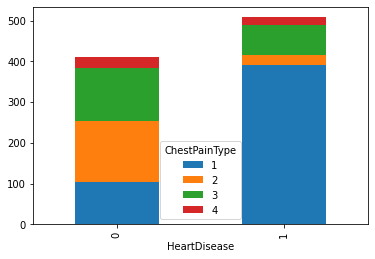

In [107]:
#Stacked bar chart to show chest pain type with heart disease
heartdata.groupby(['HeartDisease', 'ChestPainType']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [108]:
#Create Age bins to visualize it as a string
Ages = pd.DataFrame(heartdata.Age, columns=['Age'])
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
Ages['AgeBin'] = pd.cut(heartdata.Age, bins, labels = labels,include_lowest = True)

print(Ages)

     Age AgeBin
0     51  50-59
1     60  50-59
2     65  60-69
3     58  50-59
4     61  60-69
..   ...    ...
913   52  50-59
914   34  30-39
915   42  40-49
916   54  50-59
917   29  18-29

[918 rows x 2 columns]


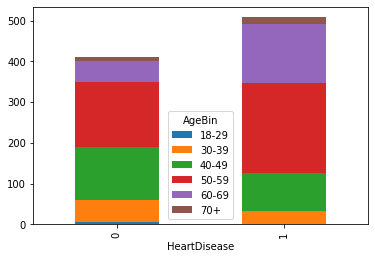

In [109]:
#Stacked bar chart to show what age has more heart diseases
heartdata.groupby(["HeartDisease", Ages.AgeBin]).size().unstack().plot(kind='bar',stacked=True)
plt.show()

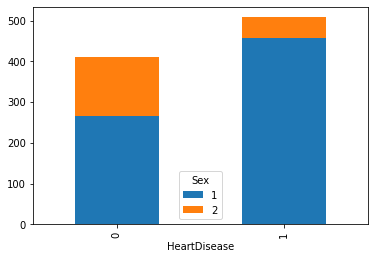

In [110]:
#Stacked bar chart to show which gender has more heart diseases
heartdata.groupby(["HeartDisease", 'Sex']).size().unstack().plot(kind='bar',stacked=True,)
plt.show()